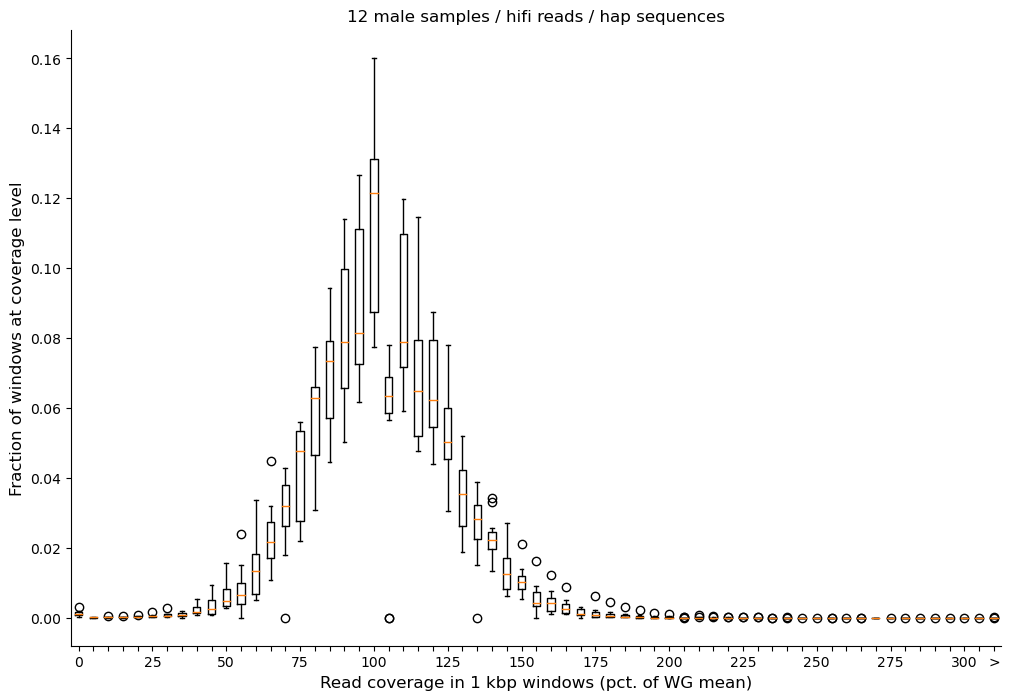

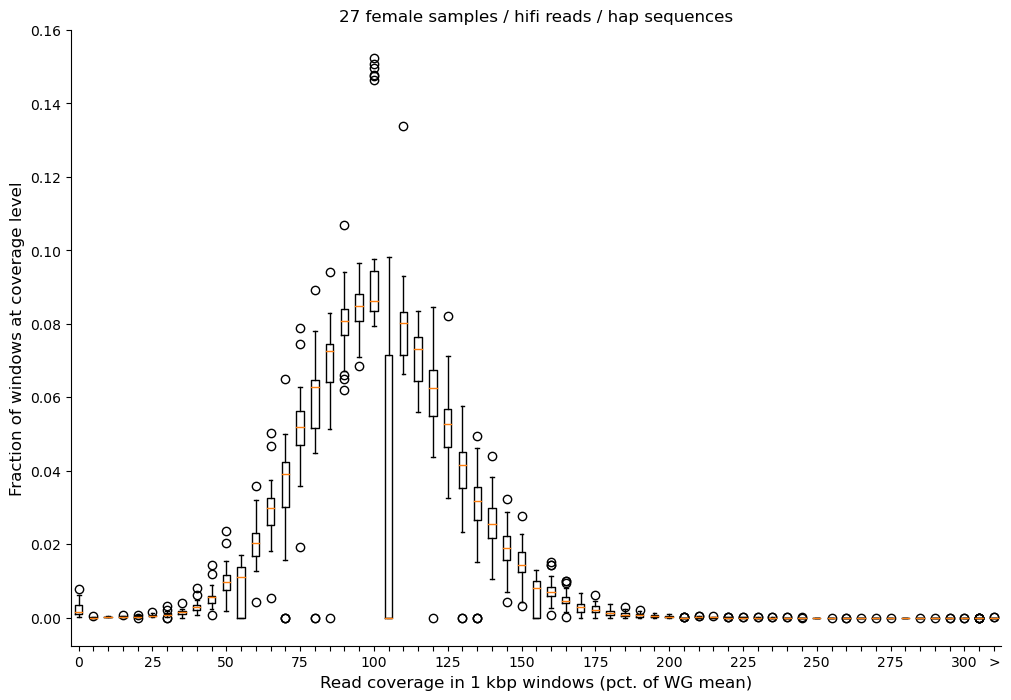

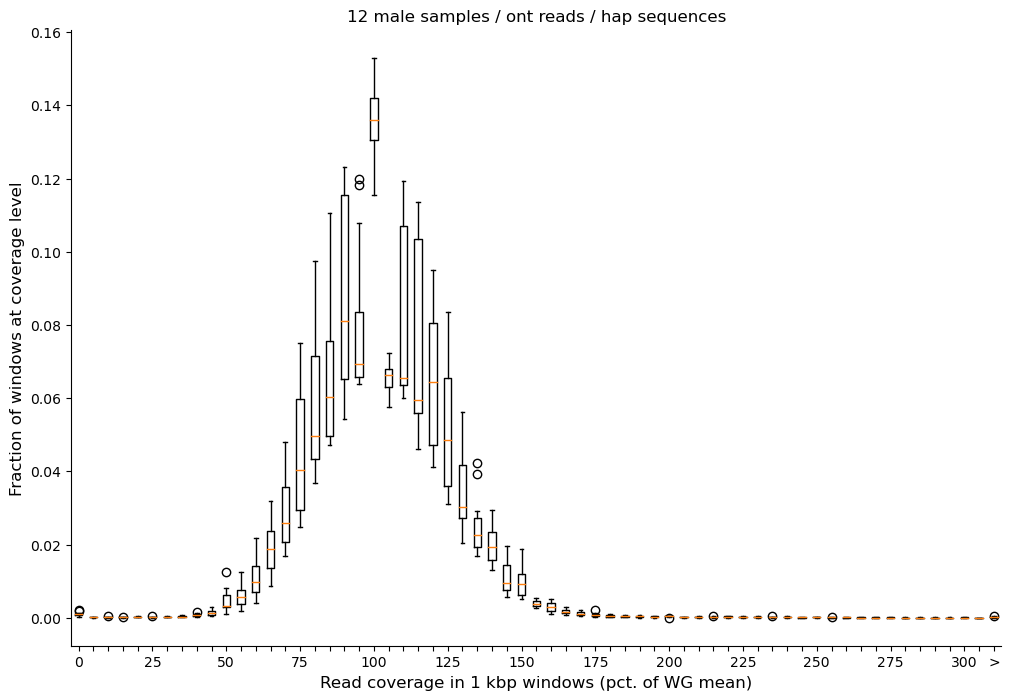

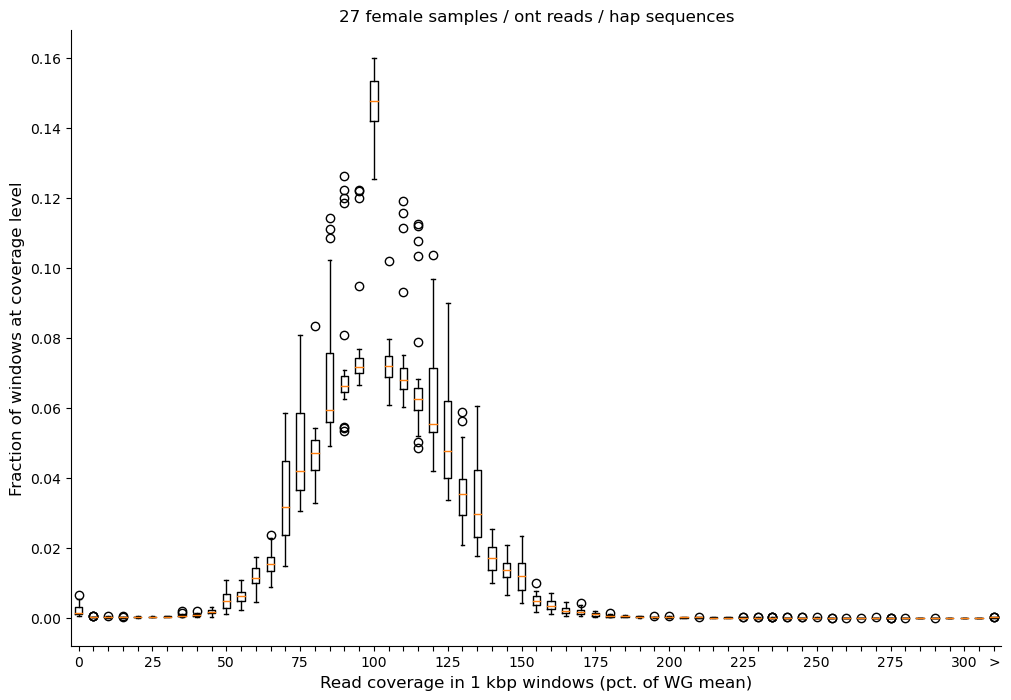

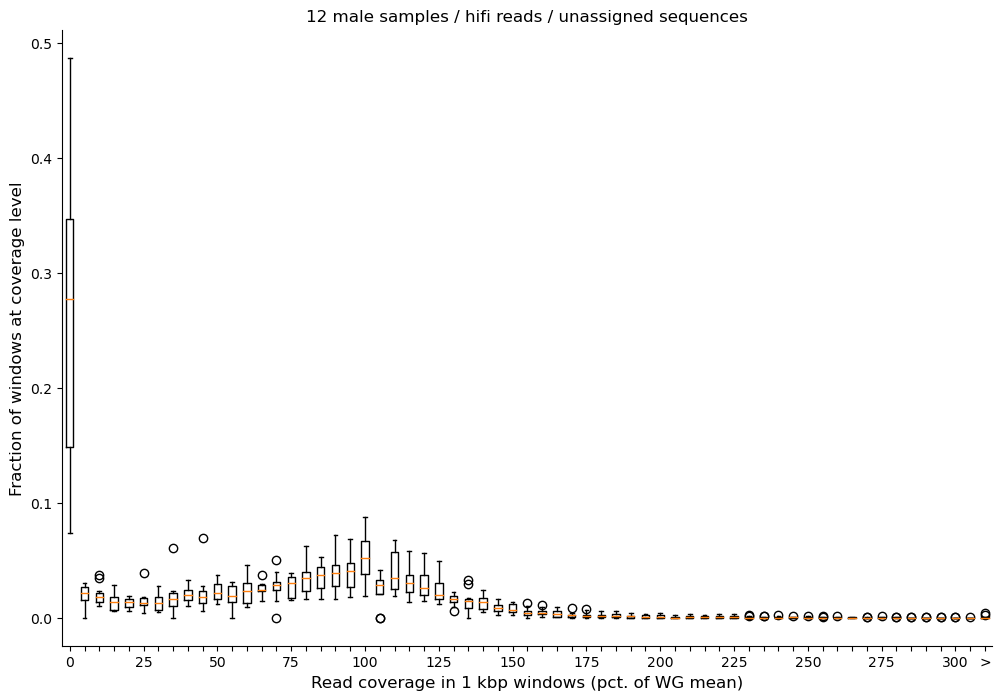

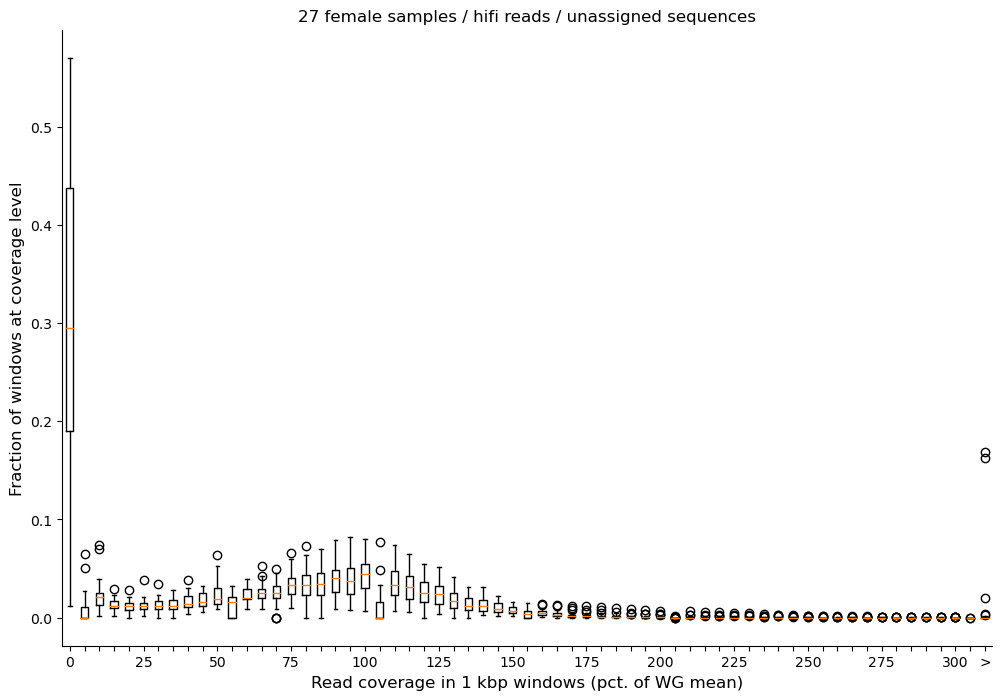

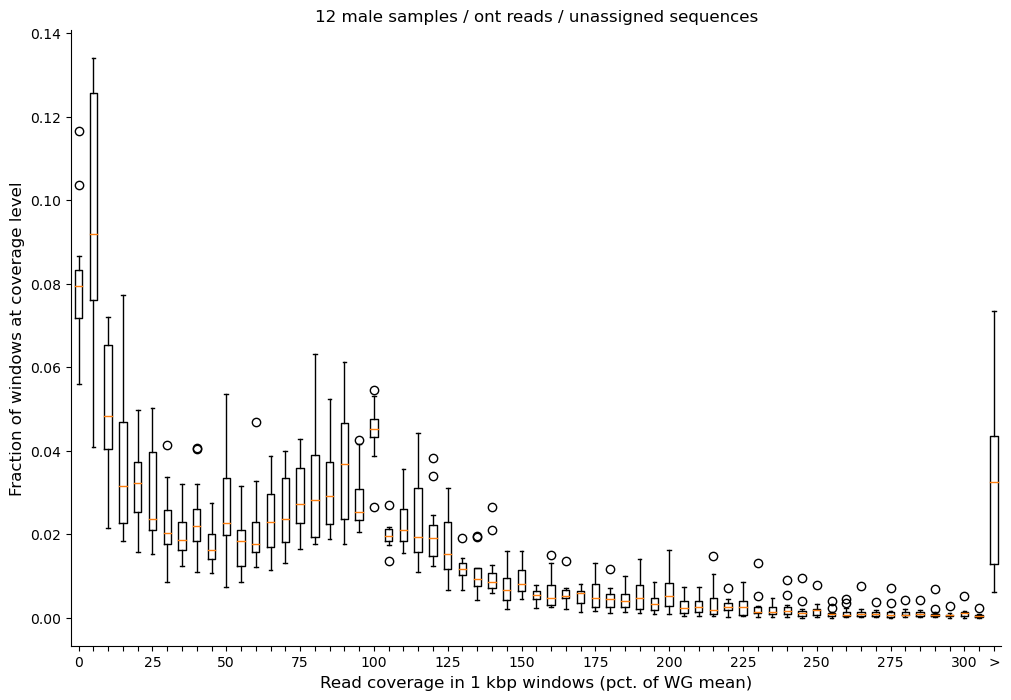

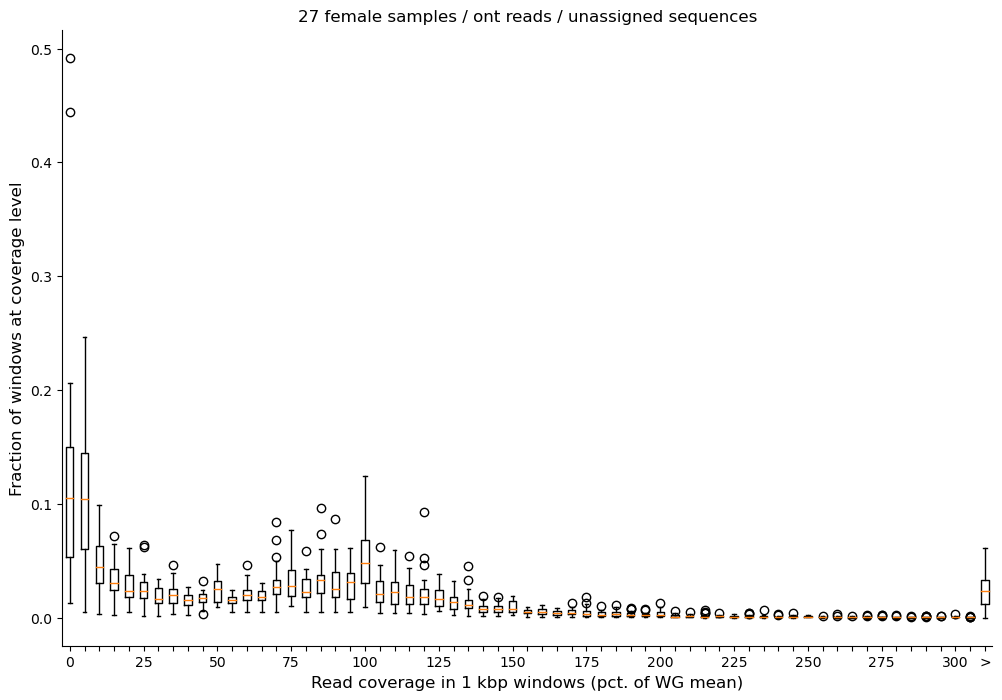

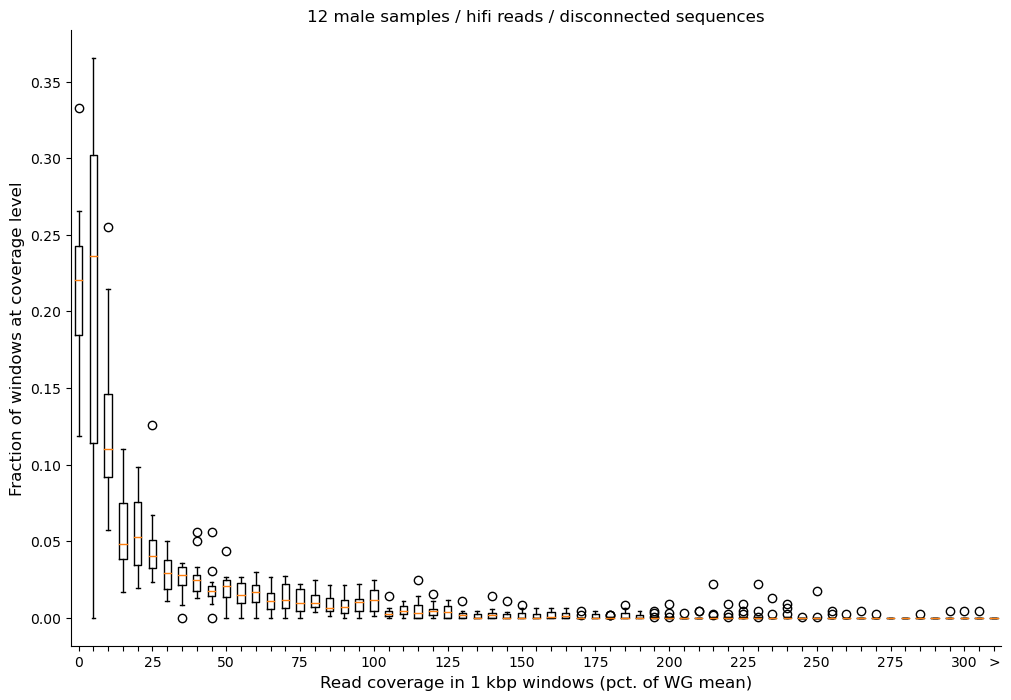

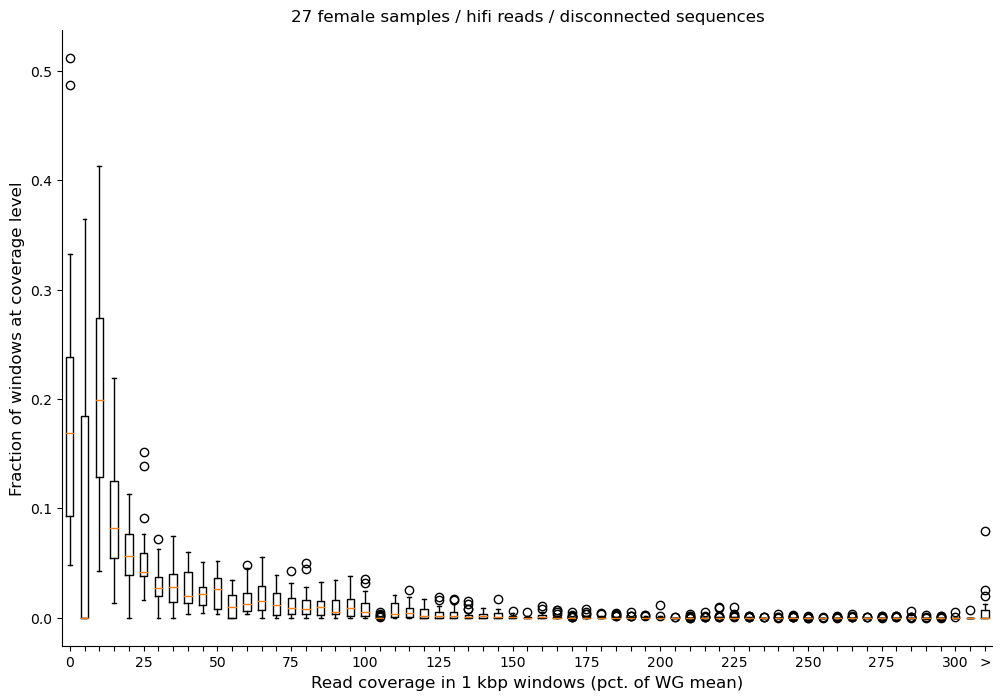

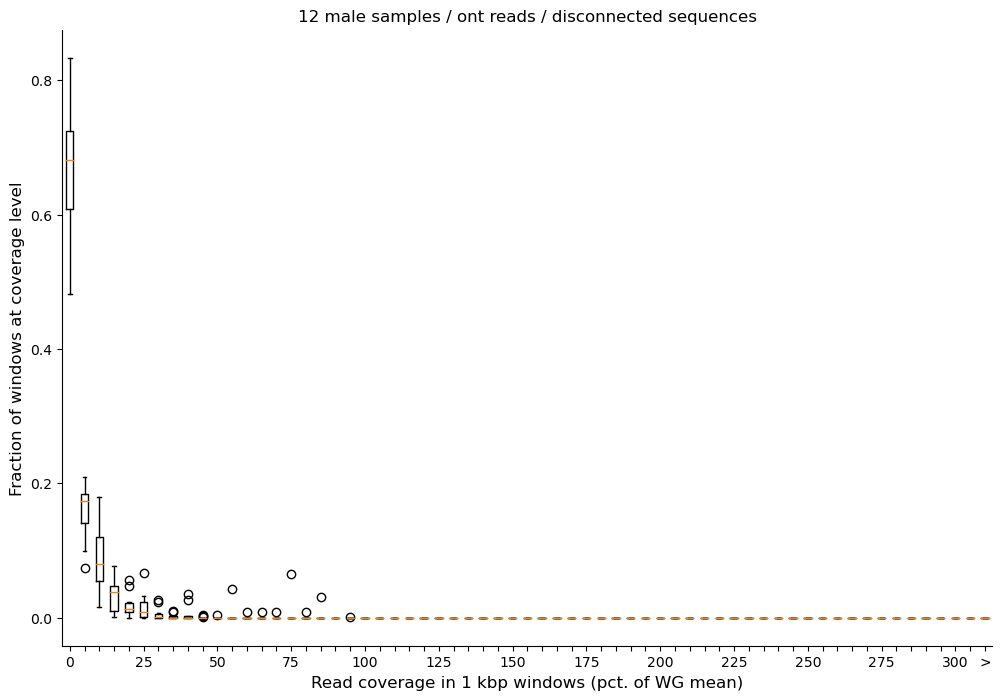

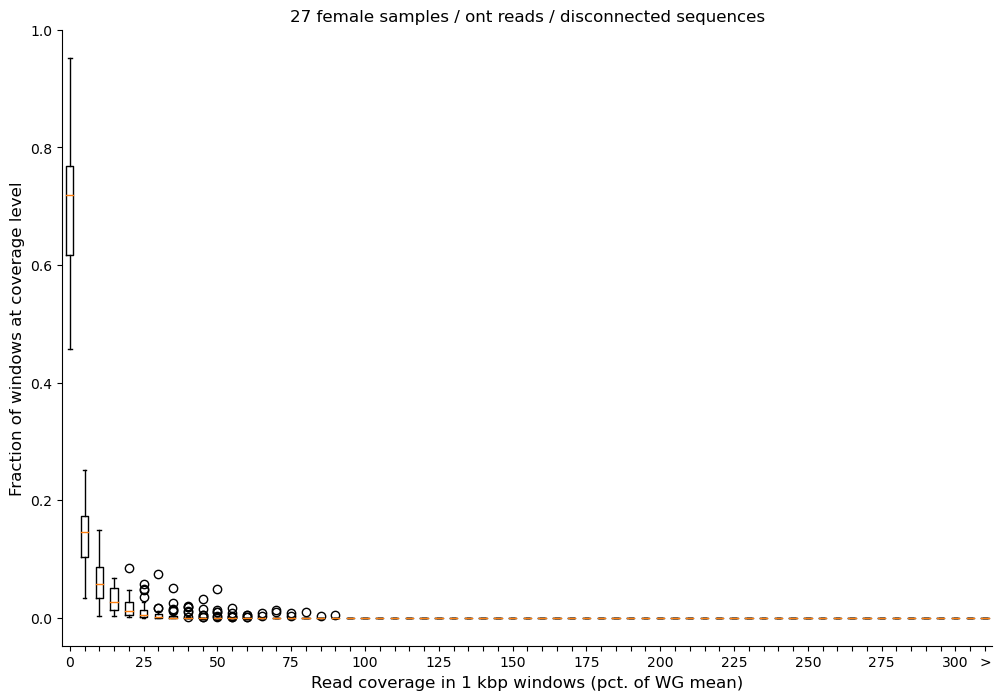

In [27]:
%run "../../../00_project_config.ipynb"

import pandas as pd
import numpy as np
import sys
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

count_files_folder = PROJECT_DATA_ROOT.joinpath(
    "2023_readassm_align/windowhist"
)

window_counts = []
for count_table in count_files_folder.glob("*.tsv"):
    df = pd.read_csv(count_table, sep="\t", header=0, index_col=[0,1,2,3,4])
    window_counts.append(df)
    
window_counts = pd.concat(window_counts, axis=0, ignore_index=False)

data_selectors = [
    ("hifi", 1, 0, "hap"),
    ("ont", 1, 0, "hap"),
    ("hifi", 1, 0, "unassigned"),
    ("ont", 1, 0, "unassigned"),
    ("hifi", 1, 0, "disconnected"),
    ("ont", 1, 0, "disconnected"),

]

sample_sex = dict((row.sample, row.sex) for row in HGSVC_SAMPLES.itertuples())

for selector in data_selectors:
    data = window_counts.xs(selector, level=["read_type", "aln_type", "mapq", "asm_unit"]).copy()
    
    pos = np.arange(1, data.shape[1]+1, step=1, dtype=int)
    labels = ["0"] + [f"{(p-1)*5}" if (p-1)*5 % 25 == 0 else "" for p in pos[1:]]
    labels[-1] = ">"
    
    data = data.divide(data.sum(axis=1), axis=0)
    data["sex"] = [sample_sex[x.split(".")[0]] for x in data.index]
    male_subset = data.loc[data["sex"] == "male", :].copy()
    male_subset.drop("sex", axis=1, inplace=True)
            
    fig, ax = plt.subplots(figsize=(12,8))
    ax.boxplot(
        male_subset,
        positions=pos
    )
    ax.set_xticks(pos)
    ax.set_xticklabels(labels, fontsize=10)
    ax.set_xlabel("Read coverage in 1 kbp windows (pct. of WG mean)", fontsize=12)
    ax.set_ylabel("Fraction of windows at coverage level", fontsize=12)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    ax.set_title(
        f"{male_subset.shape[0]} male samples / {selector[0]} reads / {selector[-1]} sequences",
        fontsize=12
    )
    
    female_subset = data.loc[data["sex"] == "female", :].copy()
    female_subset.drop("sex", axis=1, inplace=True)
    
    fig, ax = plt.subplots(figsize=(12,8))
    ax.boxplot(
        female_subset,
        positions=pos
    )
    ax.set_xticks(pos)
    ax.set_xticklabels(labels, fontsize=10)
    ax.set_xlabel("Read coverage in 1 kbp windows (pct. of WG mean)", fontsize=12)
    ax.set_ylabel("Fraction of windows at coverage level", fontsize=12)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.set_title(
        f"{female_subset.shape[0]} female samples / {selector[0]} reads / {selector[-1]} sequences",
        fontsize=12
    )
    
    plt.show()
    
    